In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

In [74]:
#Load the Data

In [96]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [76]:
# Check for missing data

In [77]:
missing_data = data.isnull().sum()
print("Columns with missing data:")
print(missing_data[missing_data > 0])



Columns with missing data:
bmi    201
dtype: int64


In [78]:
# Handle missing values for numerical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handle missing values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Confirm that there are no more missing values
print("Columns with missing data after filling:")
print(data.isnull().sum())

Columns with missing data after filling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [79]:
# Replace 'stroke' with the actual target variable column name
target_column_name = 'stroke'

# Check if the specified column name is in the dataset
if target_column_name not in data.columns:
    raise KeyError(f"'{target_column_name}' not found in the dataset. Choose a valid target variable column name.")


In [80]:
#Split the data into training and test data

In [81]:
X = data.drop(target_column_name, axis=1)
y = data[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [82]:
#Apply the Regression model

In [83]:
degree = 1
# Identify numeric columns in the dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer to handle numeric features and polynomial transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False), numeric_features)
    ])

# Create a pipeline for logistic regression
logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic_regression', LogisticRegression())
])

# Train the logistic regression model on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_regression.predict(X_test)

In [84]:
# Evaluate the logistic regression model

In [85]:
accuracy = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_logistic)

Accuracy: 0.9393346379647749
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/osx/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/osx/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/osx/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
y_pred_logistic = logistic_regression.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_logistic)
accuracy

0.9542563600782779

In [87]:
#Calculating Mean square error

In [97]:
mse = mean_squared_error(y_test, y_pred_logistic)
print("Mean Squared Error:", mse)
#visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
feature1 = 'age'
feature2 = 'avg_glucose_level'

Mean Squared Error: 0.06653620352250489


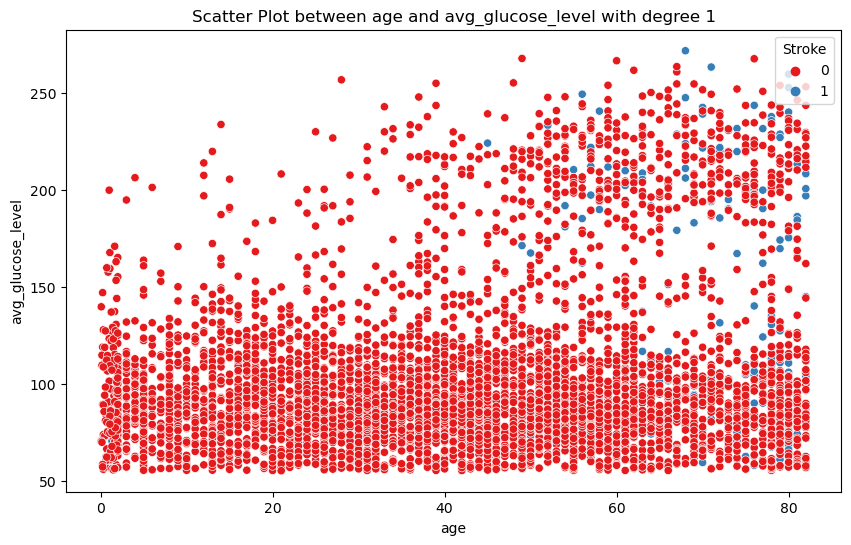

In [89]:
# Create scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, data=data, hue='stroke', palette='Set1')
plt.title(f'Scatter Plot between {feature1} and {feature2} with degree 1')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Stroke', loc='upper right')
plt.show()

In [90]:
degree = 10
# Identify numeric columns in the dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer to handle numeric features and polynomial transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False), numeric_features)
    ])

# Create a pipeline for logistic regression
logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic_regression', LogisticRegression())
])

# Train the logistic regression model on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_regression.predict(X_test)

/Users/osx/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_logistic)

Accuracy: 0.9334637964774951
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.93      0.91      1022



In [92]:
#Calculating Mean square error
mse = mean_squared_error(y_test, y_pred_logistic)
print("Mean Squared Error:", mse)
#visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
feature1 = 'age'
feature2 = 'avg_glucose_level'

Mean Squared Error: 0.06653620352250489


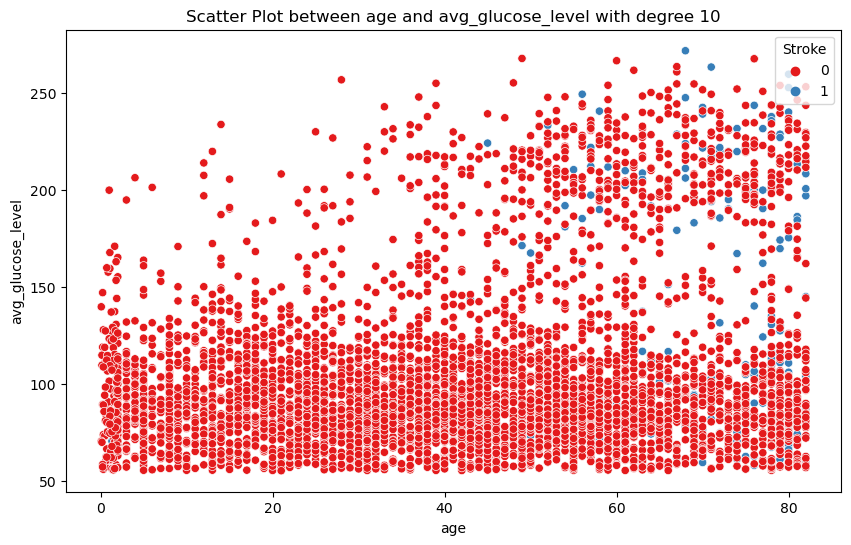

In [93]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, data=data, hue='stroke', palette='Set1')
plt.title(f'Scatter Plot between {feature1} and {feature2} with degree 10')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Stroke', loc='upper right')
plt.show()

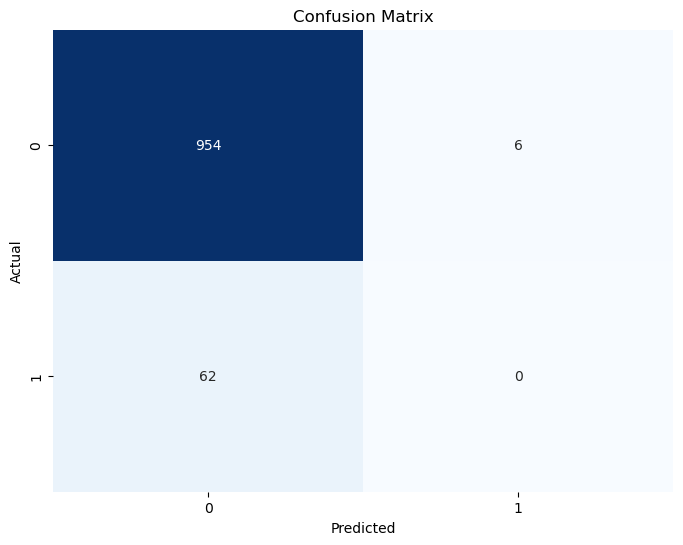

In [94]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd' , cmap= 'Blues' , cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()